In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def minmod(a,b):
    return 0.5*(np.sign(a) + np.sign(b))*np.minimum(np.abs(a), np.abs(b))

In [3]:
def median(a,b,c):
    return a + minmod(b-a,c-a)

In [4]:
def mp5(U):
    i = 2
    alpha = 4.
    uplus  = (2.*U[i-2] - 13.*U[i-1] + 47.*U[i] + 27.*U[i+1] - 3.*U[i+2])/60.
    uminus = (2.*U[i+2] - 13.*U[i+1] + 47.*U[i] + 27.*U[i-1] - 3.*U[i-2])/60.    
    delp = U[i+1] - U[i]
    delm = U[i] - U[i-1]
    ump = U[i] + minmod(delp, alpha*delm)
    if ((uplus-U[i])*(uplus-ump) > 1e-10):
        d2m = U[i-2] - 2.*U[i-1] + U[i]
        d2  = U[i-1] - 2.*U[i]   + U[i+1]
        d2p = U[i]   - 2.*U[i+1] + U[i+2]
        d2mp= minmod(minmod(4.*d2-d2p, 4*d2p-d2), minmod(d2, d2p))
        d2mm= minmod(minmod(4.*d2m-d2, 4*d2-d2m), minmod(d2m, d2))
        uul = U[i] + alpha*delm
        umd = 0.5*(U[i] + U[i+1]) - 0.5*d2mp
        ulc = U[i] + 0.5*delm + 4./3.*d2mm
        umin = np.maximum(np.amin([U[i], U[i+1], umd]), np.amin([U[i], uul, ulc]))
        umax = np.minimum(np.amax([U[i], U[i+1], umd]), np.amax([U[i], uul, ulc]))
        uplus = median(umin, uplus, umax)        
    ump = U[i] + minmod(-delm, -alpha*delp)
    if ((uminus-U[i])*(uminus-ump) > 1e-10):
        d2m = U[i+2] - 2.*U[i+1] + U[i]
        d2  = U[i+1] - 2.*U[i]   + U[i-1]
        d2p = U[i]   - 2.*U[i-1] + U[i-2]
        d2mp= minmod(minmod(4.*d2-d2p, 4*d2p-d2), minmod(d2, d2p))
        d2mm= minmod(minmod(4.*d2m-d2, 4*d2-d2m), minmod(d2m, d2))
        uul = U[i] - alpha*delp
        umd = 0.5*(U[i] + U[i-1]) - 0.5*d2mp
        ulc = U[i] - 0.5*delp + 4./3.*d2mm
        umin = np.maximum(np.amin([U[i], U[i-1], umd]), np.amin([U[i], uul, ulc]))
        umax = np.minimum(np.amax([U[i], U[i-1], umd]), np.amax([U[i], uul, ulc]))
        uminus = median(umin, uminus, umax)        
        print (umin, uminus, umax)
    return uplus, uminus

In [5]:
def parab(x):
    return x*x

2.0 2.0 2.0


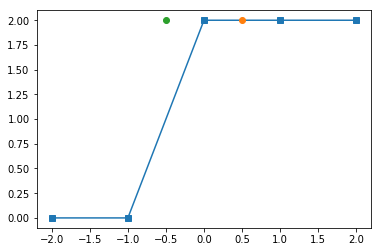

In [6]:
x = [-2., -1, 0., 1., 2.]
U = [0., 0., 2., 2., 2.]
rec = mp5(U)
plt.plot(x,U,marker='s')
plt.plot(0.5, rec[0], marker='o')
plt.plot(-0.5, rec[1], marker='o')